In [ ]:
# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# 2. Load data
data = pd.read_csv('cleaned_merged_data.csv')

In [ ]:
# 3. Select features (pre-departure + weather features only)
selected_columns = [
    'AirTime', 'Distance', 'TaxiOut', 'TaxiIn',
    'T2M_RANGE', 'T2MDEW', 'T2M_MIN', 'T2M_MAX',
    'QV2M', 'RH2M', 'PRECTOTCORR',
    'WS10M_RANGE', 'WD10M', 'WS50M_RANGE', 'WD50M',
    'DepDel15'  # Target
]

In [ ]:
data_selected = data[selected_columns]
data_cleaned = data_selected.dropna()


In [ ]:
# 4. Sample 3000 rows
sampled_data = data_cleaned.sample(n=3000, random_state=42)

In [ ]:
# 5. Features and Target
X = sampled_data.drop('DepDel15', axis=1)
y = sampled_data['DepDel15']

In [ ]:
# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
# Showing first 5 rows of X_train before scaling
print("Sample of X_train (Before Scaling):")
display(pd.DataFrame(X_train).head())

# Showing first 5 rows of X_test before scaling
print("Sample of X_test (Before Scaling):")
display(pd.DataFrame(X_test).head())


Sample of X_train (Before Scaling):


,AirTime,Distance,TaxiOut,TaxiIn,T2M_RANGE,T2MDEW,T2M_MIN,T2M_MAX,QV2M,RH2M,PRECTOTCORR,WS10M_RANGE,WD10M,WS50M_RANGE,WD50M
206071,212.0,1605.0,34.0,6.0,0.719298,0.578143,0.664088,0.748949,0.327804,0.231560,0.000337,0.142098,0.850671,0.250707,0.799438
120801,84.0,533.0,11.0,6.0,0.910931,0.384254,0.541355,0.741800,0.168246,0.185581,0.000000,0.142762,0.681488,0.209960,0.634831
127500,107.0,836.0,11.0,7.0,0.993702,0.547591,0.546425,0.784483,0.297788,0.356022,0.000000,0.245020,0.469799,0.334465,0.465730
249366,168.0,1201.0,12.0,8.0,0.914980,0.156287,0.229723,0.498108,0.049763,0.252952,0.000000,0.163347,0.608781,0.236559,0.600281
64191,80.0,563.0,14.0,8.0,0.710751,0.740599,0.931163,0.955425,0.527646,0.151549,0.000000,0.302789,0.232383,0.332767,0.261517


Sample of X_test (Before Scaling):


,AirTime,Distance,TaxiOut,TaxiIn,T2M_RANGE,T2MDEW,T2M_MIN,T2M_MAX,QV2M,RH2M,PRECTOTCORR,WS10M_RANGE,WD10M,WS50M_RANGE,WD50M
44980,78.0,458.0,12.0,11.0,0.526316,0.856639,0.955977,0.888772,0.702212,0.271427,0.019185,0.227092,0.277964,0.308432,0.364326
17667,57.0,406.0,16.0,10.0,0.675664,0.352820,0.357791,0.487174,0.147709,0.360467,0.000000,0.239708,0.797539,0.146576,0.759551
17642,116.0,771.0,11.0,11.0,0.675664,0.352820,0.357791,0.487174,0.147709,0.360467,0.000000,0.239708,0.797539,0.146576,0.759551
231951,151.0,1014.0,10.0,5.0,0.314890,0.391304,0.371932,0.329689,0.173776,0.609946,0.078761,0.185923,0.022651,0.160724,0.013764
37351,146.0,1024.0,6.0,7.0,0.649123,0.357227,0.368730,0.483389,0.153239,0.427420,0.000000,0.181275,0.762025,0.361630,0.758146


In [ ]:
# 7. Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape, X_test_scaled.shape)

(2100, 15) (900, 15)


In [ ]:
# Showing first 5 rows of X_train_scaled after scaling
print("Sample of X_train (After Scaling):")
display(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())

# Showing first 5 rows of X_test_scaled after scaling
print("Sample of X_test (After Scaling):")
display(pd.DataFrame(X_test_scaled, columns=X_test.columns).head())


Sample of X_train (After Scaling):


,AirTime,Distance,TaxiOut,TaxiIn,T2M_RANGE,T2MDEW,T2M_MIN,T2M_MAX,QV2M,RH2M,PRECTOTCORR,WS10M_RANGE,WD10M,WS50M_RANGE,WD50M
0,1.515870,1.645484,1.631306,-0.531473,0.866457,0.294138,0.461094,0.689502,0.031906,-0.934199,-0.426648,-0.779868,1.025417,-0.253952,0.819556
1,-0.672254,-0.752701,-0.566888,-0.531473,1.885579,-0.528344,-0.029043,0.660011,-0.637022,-1.178424,-0.430879,-0.774441,0.455239,-0.605075,0.235376
2,-0.279075,-0.074856,-0.566888,-0.354960,2.325762,0.164535,-0.008799,0.836088,-0.093932,-0.273093,-0.430879,0.061306,-0.258190,0.467803,-0.364754
3,0.763702,0.741691,-0.471315,-0.178446,1.907109,-1.495383,-1.273567,-0.345279,-1.133750,-0.820571,-0.430879,-0.606206,0.210204,-0.375870,0.112758
4,-0.740633,-0.685588,-0.280167,-0.178446,0.821003,0.983278,1.527677,1.541266,0.869721,-1.359195,-0.430879,0.533449,-1.058325,0.453173,-1.089496


Sample of X_test (After Scaling):


,AirTime,Distance,TaxiOut,TaxiIn,T2M_RANGE,T2MDEW,T2M_MIN,T2M_MAX,QV2M,RH2M,PRECTOTCORR,WS10M_RANGE,WD10M,WS50M_RANGE,WD50M
0,-0.774822,-0.920485,-0.471315,0.351093,-0.159841,1.475521,1.626770,1.266307,1.601567,-0.722438,-0.189678,-0.085221,-0.904707,0.243474,-0.724633
1,-1.133811,-1.036815,-0.089020,0.174580,0.634404,-0.661685,-0.762119,-0.390382,-0.723121,-0.249482,-0.430879,0.017891,0.846353,-1.151268,0.677997
2,-0.125223,-0.220268,-0.566888,0.351093,0.634404,-0.661685,-0.762119,-0.390382,-0.723121,-0.249482,-0.430879,0.017891,0.846353,-1.151268,0.677997
3,0.473092,0.323350,-0.662462,-0.707986,-1.284224,-0.498435,-0.705647,-1.040047,-0.613841,1.075680,0.559314,-0.421690,-1.765157,-1.029350,-1.968757
4,0.387619,0.345721,-1.044756,-0.354960,0.493258,-0.642993,-0.718433,-0.405995,-0.699940,0.106157,-0.430879,-0.459679,0.726663,0.701885,0.673013


**Random Forest Classifier:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict
rf_pred = rf_model.predict(X_test_scaled)

In [ ]:
# Accuracy
rf_acc = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_acc:.4f}")

Random Forest Accuracy: 0.8078


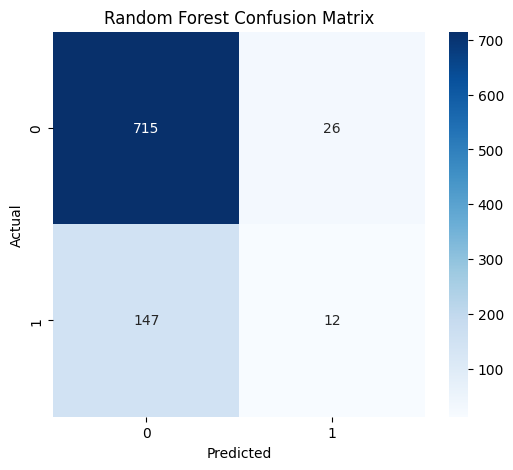

              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89       741
         1.0       0.32      0.08      0.12       159

    accuracy                           0.81       900
   macro avg       0.57      0.52      0.51       900
weighted avg       0.74      0.81      0.76       900



In [ ]:
# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6,5))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, rf_pred))

**AdaBoost Classifier:**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Train AdaBoost
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train_scaled, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
# Predict
ada_pred = ada_model.predict(X_test_scaled)

In [ ]:
# Accuracy
ada_acc = accuracy_score(y_test, ada_pred)
print(f"AdaBoost Accuracy: {ada_acc:.4f}")

AdaBoost Accuracy: 0.8244


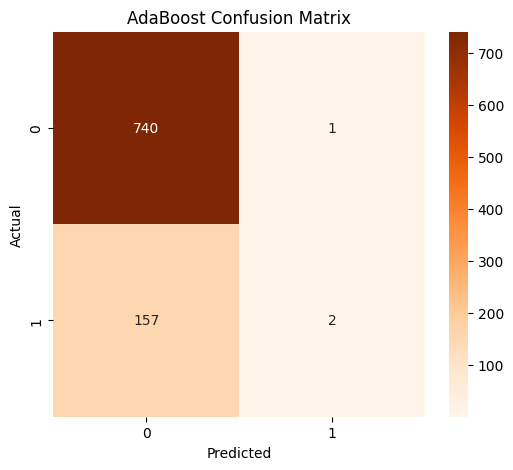

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       741
         1.0       0.67      0.01      0.02       159

    accuracy                           0.82       900
   macro avg       0.75      0.51      0.46       900
weighted avg       0.80      0.82      0.75       900



In [ ]:
# Confusion Matrix
ada_cm = confusion_matrix(y_test, ada_pred)
plt.figure(figsize=(6,5))
sns.heatmap(ada_cm, annot=True, fmt='d', cmap='Oranges')
plt.title('AdaBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, ada_pred))

**XGBoost Classifier:**

In [ ]:
# Install XGBoost if not installed
# !pip install xgboost

from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict
xgb_pred = xgb_model.predict(X_test_scaled)



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:10:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Accuracy
xgb_acc = accuracy_score(y_test, xgb_pred)
print(f"XGBoost Accuracy: {xgb_acc:.4f}")


XGBoost Accuracy: 0.7878


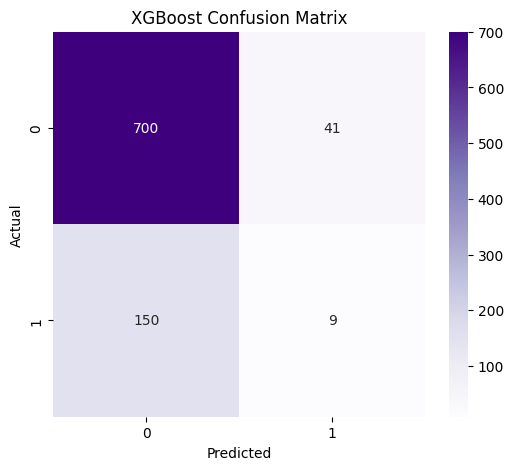

              precision    recall  f1-score   support

         0.0       0.82      0.94      0.88       741
         1.0       0.18      0.06      0.09       159

    accuracy                           0.79       900
   macro avg       0.50      0.50      0.48       900
weighted avg       0.71      0.79      0.74       900



In [ ]:
# Confusion Matrix
xgb_cm = confusion_matrix(y_test, xgb_pred)
plt.figure(figsize=(6,5))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Purples')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, xgb_pred))

**Compare Model Accuracies: **

<ipython-input-20-ef01fbfc29d9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='pastel')


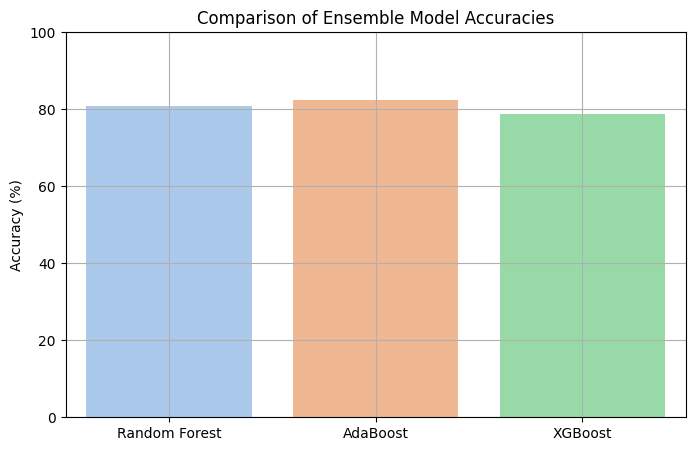

In [ ]:
models = ['Random Forest', 'AdaBoost', 'XGBoost']
accuracies = [rf_acc*100, ada_acc*100, xgb_acc*100]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies, palette='pastel')
plt.title('Comparison of Ensemble Model Accuracies')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()
